# A two-component mixture-of-exponentials model for the duration of untreated _C. trachomatis_ infection in men

This notebook runs STAN models for the duration of untreated chlamydia infections in men and women, and produces numerical and graphical summaries of the results.

For a comparison to other models, see `model_comparisons.ipynb`. For sensitivity analysis, see `sensitivity_analysis.ipynb`.

## Load the data

Begin by loading the `rstan` package, and data for duration of infection in men and women.

In [1]:
library(rstan)

load("data_m.RData")
load("data_f.RData")

Loading required package: ggplot2
Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.2.5"rstan (Version 2.12.1, packaged: 2016-09-11 13:07:50 UTC, GitRev: 85f7a56811da)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


## Run the model

Now run the two-component mixture model in STAN, to sample from posterior parameter distributions for men and women.

In [2]:
####################
# initial values
####################

# Initial values - 0
init0 <- list(psi = 7/77, lambda_slow = 0.74, p1 = 0.23)

# Initial values - 1
init1 <- list(psi = 0.9, lambda_slow = 0.7, p1 = 0.2)

# Initial values - 2
init2 <- list(psi = 0.6, lambda_slow = 0.1, p1 = 0.5)

####################
# run the model
####################

fit_m <- stan(file = 'chlamydia_two_exponentials_men.stan', 
              data = chlamydia_dat_m, 
              iter = 22000, warmup = 2000, init=list(init0, init1, init2), chains = 3, seed=12345,
              sample_file = 'results/sample_men.csv', verbose = FALSE
             )

op_m <- extract(fit_m)

fit_f <- stan(file = 'chlamydia_two_exponentials_women.stan', 
              data = chlamydia_dat_f, 
              iter = 22000, warmup = 2000, init=list(init0, init1, init2), chains = 3, seed=12345,
              sample_file = 'results/sample_women.csv', verbose = FALSE
             )

op_f <- extract(fit_f)


In file included from file16c159b2f524.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:42:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:17: warning: unused function 'set_zero_all_adjoints' [-Wunused-function]
    static void set_zero_all_adjoints() {
                ^
In file included from file16c159b2f524.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/src/stan/model/

Warning message:
"There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"

In file included from file16c1625ed354.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:42:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:17: warning: unused function 'set_zero_all_adjoints' [-Wunused-function]
    static void set_zero_all_adjoints() {
                ^
In file included from file16c1625ed354.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/src/stan/model/

The following numerical problems occured the indicated number of times after warmup on chain 1
                                                                                                     count
Exception thrown at line 94: binomial_log: Probability parameter is nan, but must be finite!             4
Exception thrown at line 94: binomial_log: Probability parameter is 1, but must be in the interval [     1
When a numerical problem occurs, the Hamiltonian proposal gets rejected.
See http://mc-stan.org/misc/warnings.html#exception-hamiltonian-proposal-rejected
If the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'chlamydia_two_exponentials_women' NOW (CHAIN 2).

Chain 2, Iteration:     1 / 22000 [  0%]  (Warmup)
Chain 2, Iteration:  2001 / 22000 [  9%]  (Sampling)
Chain 2, Iteration:  4200 / 22000 [ 19%]  (Sampling)
Chain 2, Iteration:  6400 / 22000 [ 29%]  (Sampling)
Chain 2, Iteration:  8600 / 22000 [ 39%]  (Sampling)
Chain 2, Iteration: 10800 / 22000 [ 49%]  (Sampling)
Chain 2, Iteration: 13000 / 22000 [ 59%]  (Sampling)
Chain 2, Iteration: 15200 / 22000 [ 69%]  (Sampling)
Chain 2, Iteration: 17400 / 22000 [ 79%]  (Sampling)
Chain 2, Iteration: 19600 / 22000 [ 89%]  (Sampling)
Chain 2, Iteration: 21800 / 22000 [ 99%]  (Sampling)
Chain 2, Iteration: 22000 / 22000 [100%]  (Sampling)
 Elapsed Time: 5.22338 seconds (Warm-up)
               48.8929 seconds (Sampling)
               54.1162 seconds (Total)

Sample of chain 2 is written to file results/sample_women_2.csv.


The following numerical problems occured the indicated number of times after warmup on chain 2
                                                                                                     count
Exception thrown at line 94: binomial_log: Probability parameter is nan, but must be finite!             4
Exception thrown at line 94: binomial_log: Probability parameter is 1, but must be in the interval [     3
When a numerical problem occurs, the Hamiltonian proposal gets rejected.
See http://mc-stan.org/misc/warnings.html#exception-hamiltonian-proposal-rejected
If the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'chlamydia_two_exponentials_women' NOW (CHAIN 3).

Chain 3, Iteration:     1 / 22000 [  0%]  (Warmup)
Chain 3, Iteration:  2001 / 22000 [  9%]  (Sampling)
Chain 3, Iteration:  4200 / 22000 [ 19%]  (Sampling)
Chain 3, Iteration:  6400 / 22000 [ 29%]  (Sampling)
Chain 3, Iteration:  8600 / 22000 [ 39%]  (Sampling)
Chain 3, Iteration: 10800 / 22000 [ 49%]  (Sampling)
Chain 3, Iteration: 13000 / 22000 [ 59%]  (Sampling)
Chain 3, Iteration: 15200 / 22000 [ 69%]  (Sampling)
Chain 3, Iteration: 17400 / 22000 [ 79%]  (Sampling)
Chain 3, Iteration: 19600 / 22000 [ 89%]  (Sampling)
Chain 3, Iteration: 21800 / 22000 [ 99%]  (Sampling)
Chain 3, Iteration: 22000 / 22000 [100%]  (Sampling)
 Elapsed Time: 5.06062 seconds (Warm-up)
               48.5017 seconds (Sampling)
               53.5623 seconds (Total)

Sample of chain 3 is written to file results/sample_women_3.csv.


The following numerical problems occured the indicated number of times after warmup on chain 3
                                                                                                     count
Exception thrown at line 94: binomial_log: Probability parameter is 1, but must be in the interval [     7
Exception thrown at line 94: binomial_log: Probability parameter is nan, but must be finite!             2
When a numerical problem occurs, the Hamiltonian proposal gets rejected.
See http://mc-stan.org/misc/warnings.html#exception-hamiltonian-proposal-rejected
If the number in the 'count' column is small, do not ask about this message on stan-users.


Alternatively, you can read in the samples from files that have already been run:

In [3]:
# fit_m <- read_stan_csv(c('results/sample_men_1.csv', 'results/sample_men_2.csv', 'results/sample_men_3.csv'))
# op_m <- extract(fit_m)

# fit_f <- read_stan_csv(c('results/sample_women_1.csv', 'results/sample_women_2.csv', 'results/sample_women_3.csv'))
# op_f <- extract(fit_f)

## Summarise posterior distributions

Proportion of incident infections in men which clear slowly:

In [4]:
paste('Posterior mean proportion slow-clearing: ', round(1 - mean(op_m$p1),3), '.', sep="")
paste('50th (2.5th, 97.5th) centiles for proportion slow-clearing: ', 
      round(quantile(1 - op_m$p1, p=0.5),3), 
      ' (', 1 - round(quantile(op_m$p1, p=0.975),3), ',', 
      1 - round(quantile(op_m$p1, p=0.025),3), ') ',
      '.', sep='')

[1] "Posterior mean proportion slow-clearing: 0.677."

[1] "50th (2.5th, 97.5th) centiles for proportion slow-clearing: 0.677 (0.571,0.779) ."

Clearance rate of slow-clearing infections:

In [5]:
paste('Posterior mean slow clearance rate:', round(mean(op_m$lambda_slow),2), 'per year.')
paste('50th (2.5th, 97.5th) centiles for slow clearance rate: ', 
      round(quantile(op_m$lambda_slow, p=0.5),2), 
      ' (', round(quantile(op_m$lambda_slow, p=0.025),2), ',', 
      round(quantile(op_m$lambda_slow, p=0.975),2), ') ',
      'per year.', sep='')

[1] "Posterior mean slow clearance rate: 0.42 per year."

[1] "50th (2.5th, 97.5th) centiles for slow clearance rate: 0.35 (0.06,1.14) per year."

Assuming that clearance rate remains constant, the mean duration of infections equals the reciprocal of the clearance rate. The mean durations corresponding to the clearance rates above are:

In [6]:
paste('1 / Posterior mean slow clearance rate:', round(1/mean(op_m$lambda_slow),2), 'years.')

paste('1 / [50th (97.5th, 2.5th) centiles for slow clearance rate]: ', 
      round(1/quantile(op_m$lambda_slow, p=0.5),2), 
      ' (', round(1/quantile(op_m$lambda_slow, p=0.975),2), ',', 
      round(1/quantile(op_m$lambda_slow, p=0.025),2), ') ',
      'years.', sep='')

[1] "1 / Posterior mean slow clearance rate: 2.4 years."

[1] "1 / [50th (97.5th, 2.5th) centiles for slow clearance rate]: 2.83 (0.88,18.06) years."

In [7]:
'Summarise overall mean duration'
paste('mean:',
      mean((op_m$p1 / op_m$lambda[,1]) + ((1-op_m$p1) / op_m$lambda[,2]))
      )
quantile((op_m$p1 / op_m$lambda[,1]) + ((1-op_m$p1) / op_m$lambda[,2]), p=c(0.5, 0.025, 0.975))

'Summarise overall clearance rate'
paste('mean',
      mean((op_m$p1 * op_m$lambda[,1]) + ((1-op_m$p1) * op_m$lambda[,2]))
      )
quantile((op_m$p1 * op_m$lambda[,1]) + ((1-op_m$p1) * op_m$lambda[,2]), p=c(0.5, 0.025, 0.975))

[1] "Summarise overall mean duration"

[1] "mean: 3.04175828145543"

50%       2.5%      97.5% 
 1.9138502  0.6173254 12.0725187

[1] "Summarise overall clearance rate"

[1] "mean 16.1129618271285"

50%     2.5%    97.5% 
16.09256 11.23518 21.19071

## Model fit

Model fit to the data is quantified using the Deviance Information Criterion (DIC):

In [8]:
# expectation of the deviance
Dbar_m <- mean(op_m$sumdev)

# Effective number of parameters (Spiegelhalter)
thetabar <- apply(op_m$theta,2,mean)
D_thetabar <- -2*sum(
    dbinom(chlamydia_dat_m$r, chlamydia_dat_m$n, thetabar, log=TRUE) -
    dbinom(chlamydia_dat_m$r, chlamydia_dat_m$n, chlamydia_dat_m$r/chlamydia_dat_m$n, log=TRUE)
    )
p_DS_m <- Dbar_m - D_thetabar

# Effective number of parameters (Gelman)
p_DG_m <- 0.5 * var(op_m$sumdev)

# choose your p_D
p_Dm <- p_DS_m

# DIC
DIC_m <- p_Dm + Dbar_m

paste('Posterior mean residual deviance: ', round(Dbar_m,1), '.', collapse="")
paste('DIC: ', round(DIC_m,1), '.', collapse="")

[1] "Posterior mean residual deviance:  21.6 ."

[1] "DIC:  23.3 ."

## Posterior predictive check

As a posterior predictive check, we calculate the crude clearance rate corresponding to each data point using the formula $–ln(1 – \theta)/t$ where $\theta$ is the proportion of men who had cleared infection by the observation time $t$. This is compared to crude clearance rate calculated from the posterior samples. 

In [9]:
# get crude estimates of clearance rate

t <- chlamydia_dat_m$t 
n <- chlamydia_dat_m$n 
r <- chlamydia_dat_m$r 

theta <- matrix(nrow=length(n), ncol=3)  # proportion cleared infection. each row is (estimate, lower, upper)
cr <- matrix(nrow=length(n), ncol=3)     # mean duration of infection. each row is (estimate, lower, upper)

for(i in 1:length(n)){
    theta[i,1] <- r[i]/n[i]
    cr[i,1] <- -log(1 - theta[i,1])/t[i]

    theta[i,2] <- binom.test(r[i],n[i])[['conf.int']][1]
    cr[i,3] <- -log(1 - theta[i,2])/t[i]

    theta[i,3] <- binom.test(r[i],n[i])[['conf.int']][2]
    cr[i,2] <- -log(1 - theta[i,3])/t[i]
    }


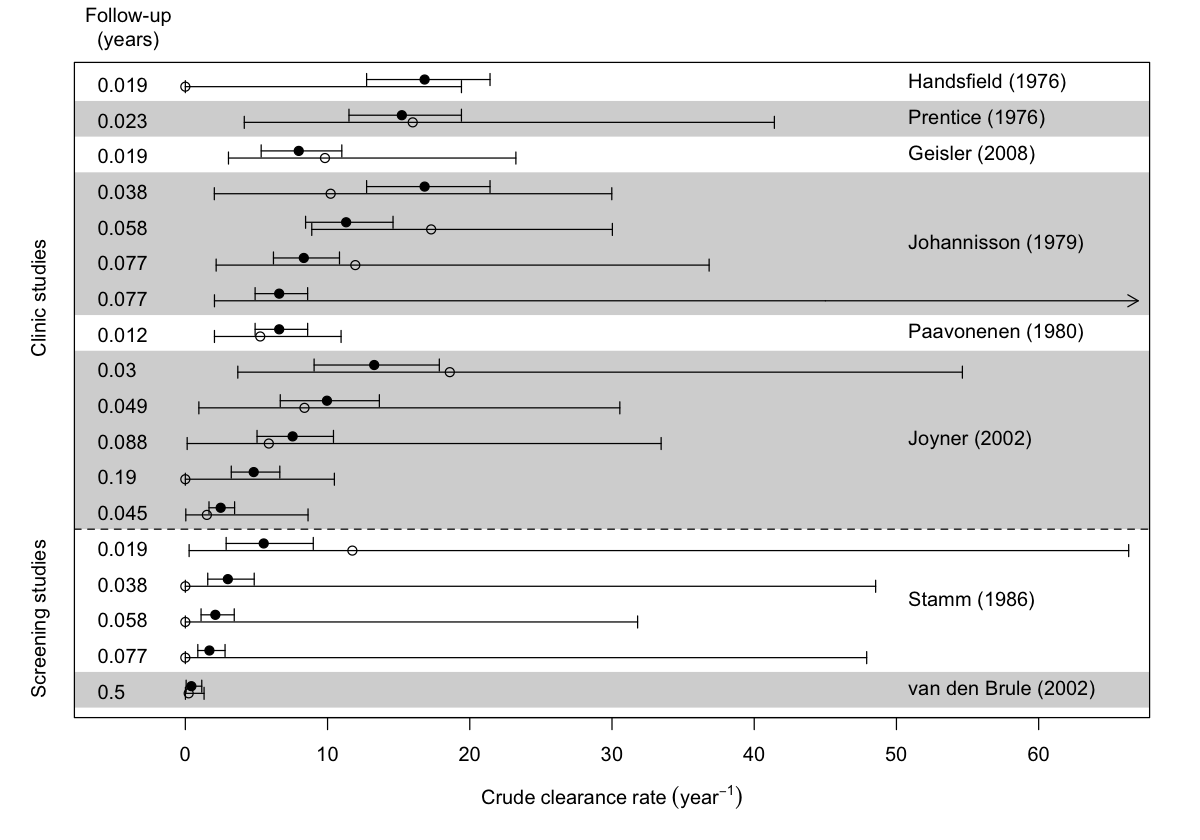

In [10]:
options(repr.plot.width=10, repr.plot.height=7)

study_order <- c(1,2,13,3:12,14:18) # which columns to use from samples for theta

par(mar = c(5.1, 3.1, 2.6, 2.1))
plot(cr[study_order,1], seq(length(n),1,-1), xlim=c(-5, 65), xlab = expression(Crude~clearance~rate~(year^{-1})), ylab = "", xaxt="n", yaxt="n")
arrows(y0=seq(length(n),1,-1), x0=cr[study_order,2], x1=cr[study_order,3], length=0.05, angle=90, code=3)

# special arrows where all recovered
arrows(y0=seq(length(n),1,-1)[n[study_order] == r[study_order]], x0=cr[n[study_order] == r[study_order],3], x1=45, length=0.05, angle=90, code=1) # all recovered
arrows(y0=seq(length(n),1,-1)[n[study_order] == r[study_order]], x0=45, x1=67, length=0.1, angle=30, code=2) # all recovered

points(apply(-log(1 - op_m$theta[,study_order]), 2, mean)/t[study_order], seq(length(n),1,-1) + 0.2, pch=19)
arrows(y0=seq(length(n),1,-1) + 0.2, 
       x0=apply(-log(1 - op_m$theta[,study_order]), 2, quantile, p=0.025)/t[study_order], 
       x1=apply(-log(1 - op_m$theta[,study_order]), 2, quantile, p=0.975)/t[study_order], 
       length=0.05, angle=90, code=3)

abline(h=5.6, lty=2)

polygon(c(-10, 5000, 5000, -10), c(0.6, 0.6, 1.6, 1.6), col=rgb(0,0,0,0.2), border=NA)
text(50, 1.1, "van den Brule (2002)", pos=4)
text(50, mean(c(2, 5.2)), "Stamm (1986)", pos=4)
polygon(c(-10, 5000, 5000, -10), c(5.6, 5.6, 10.6, 10.6), col=rgb(0,0,0,0.2), border=NA)
text(50, mean(c(6, 10.2)), "Joyner (2002)", pos=4)
text(50, 11.1, "Paavonenen (1980)", pos=4)
polygon(c(-10, 5000, 5000, -10), c(11.6, 11.6, 15.6, 15.6), col=rgb(0,0,0,0.2), border=NA)
text(50, mean(c(12,15.2)), "Johannisson (1979)", pos=4)
text(50, 16.1, "Geisler (2008)", pos=4)
polygon(c(-10, 5000, 5000, -10), c(16.6, 16.6, 17.6, 17.6), col=rgb(0,0,0,0.2), border=NA)
text(50, 17.1, "Prentice (1976)", pos=4)
text(50, 18.1, "Handsfield (1976)", pos=4)

text(-7, seq(length(n),1,-1), as.character(t), pos=4)

axis(side=1)
axis(side = 2, at = c(3.1, 12.1), labels = c("Screening studies", "Clinic studies"), tick=FALSE)
axis(side=3, at = -4, tick=FALSE, labels = 'Follow-up\n(years)', line=-0.5)


Crude clearance rate estimated from data is shown as open circles. Crude clearance rate simulated from the model is shown as closed circles. Error bars give the 95% confidence interval for crude estimates, and the central 95% of simulations. For crude estimates, an arrow pointing right indicates that all men cleared the infection, so there is no upper bound or estimate for the crude clearance rate. The first six studies (above the dashed line) were clinic-based, and the last two (below the line) were screening studies. Within this grouping, studies are ordered by maximum duration of follow-up. Follow-up in years at each observation is indicated on the left-hand side.

## Posterior distribution for the slow clearance rate

Plot the posterior distributions for slow clearance rate in men and women.

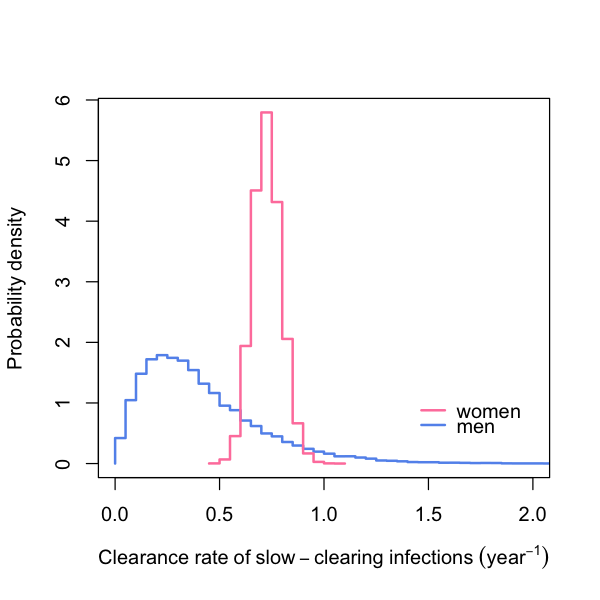

In [11]:
##################################
# posterior for slow clearance rates 
##################################

options(repr.plot.width=5, repr.plot.height=5)

fhist <- hist(op_f$lambda_slow, plot=FALSE)
fxhist <- c(min(fhist$breaks), fhist$breaks)
fyhist <- c(0, fhist$density, 0)

mhist <- hist(op_m$lambda_slow, breaks=seq(0, ceiling(max(op_m$lambda_slow)), fxhist[3] - fxhist[2]), plot=FALSE)
mxhist <- c(min(mhist$breaks), mhist$breaks)
myhist <- c(0, mhist$density, 0)


plot(mxhist, myhist, type="s", xlim=c(0,2), ylim=c(0,max(c(myhist, fyhist))),  
    col='cornflowerblue', lwd=2, # this line for colour version
    xlab = expression(Clearance~rate~of~slow-clearing~infections~(year^{-1})),
    ylab = "Probability density"
    )
lines(fxhist, fyhist, type="s", ylim=c(0,max(fyhist)), 
    col='palevioletred1', lwd=2 # this line for colour version
    #col=gray(0.5), lty=2 # this line for black and white
    )

legend('bottomright', inset=0.1, lty=1, 
       col=c('palevioletred1','cornflowerblue'), legend=c("women", "men"), bg='white', lwd=2, box.lwd=0) # colour
#legend('bottomright', lty=c(2,1), col=c(gray(0.5),1), legend=c("women", "men"), bg='white') # black and white

Note that these distributions are based on follow-up of up to six months in men and four years in women.

## Survival curves

Survival curves for the proportion of incident and prevalent infections in men which remain uncleared.

In [12]:
##################################
# survival curves
##################################

lambda_fast <- 49

# set up matrices for results
sim_times <- seq(0, 0.5, 0.001)
sims_slow <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))
sims_all <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))
sims_prev <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))

for(i in 1:nrow(op_m$lambda_slow)){

    sims_slow[i,] <- exp(-op_m$lambda_slow[i] * sim_times)
    sims_all[i,] <- op_m$p1[i]*exp(-lambda_fast * sim_times) + (1-op_m$p1[i])*exp(-op_m$lambda_slow[i] * sim_times)
    
    wk <- c(op_m$p1[i]/lambda_fast, (1-op_m$p1[i])/op_m$lambda_slow[i]) / (op_m$p1[i]/lambda_fast + (1-op_m$p1[i])/op_m$lambda_slow[i])

    sims_prev[i,] <- wk[1]*exp(-lambda_fast * sim_times) + wk[2]*exp(-op_m$lambda_slow[i] * sim_times)

    }


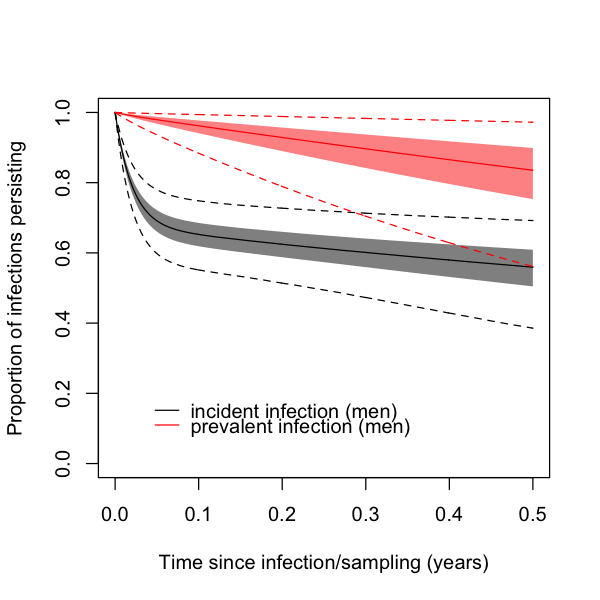

In [13]:
plot(sim_times, apply(sims_all, 2, median), type='l', ylim=c(0,1), xlim=c(0,0.5), xlab='Time since infection/sampling (years)', ylab='Proportion of infections persisting')
polygon(
    c(sim_times, rev(sim_times)), c(apply(sims_all, 2, quantile, p=0.25), rev(apply(sims_all, 2, quantile, p=0.75))), border=NA,
    col=rgb(0,0,0,0.5) # colour
    #density = 20, col = gray(0.8) # black and white
    )
lines(sim_times, apply(sims_all, 2, quantile, p=0.025), lty=2)
lines(sim_times, apply(sims_all, 2, quantile, p=0.975), lty=2)

lines(sim_times, apply(sims_prev, 2, quantile, p=0.5)
    , col=2 # colour
    )
polygon(c(sim_times, rev(sim_times)), c(apply(sims_prev, 2, quantile, p=0.25), rev(apply(sims_prev, 2, quantile, p=0.75))), border=NA,
    col=rgb(1,0,0,0.5) # colour
    #density = 20, col = gray(0.8), angle = 45+90
    )
lines(sim_times, apply(sims_prev, 2, quantile, p=0.025), lty=2
    , col=2 # colour
    )
lines(sim_times, apply(sims_prev, 2, quantile, p=0.975), lty=2
    , col=2 # colour
    )

legend('bottomleft', inset=0.1, 
       lty=1, col=1:2, legend=c("incident infection (men)", "prevalent infection (men)"), bg='white', box.lwd=0) # colour
# legend('bottomright', density = 20, col = gray(0.8), angle=c(0,90)+45, legend=c("incident infection (men)", "prevalent infection (men)"), bg='white') # black and white

In these simulated survival curves for incident and prevalent infections in men, solid lines indicate the median of the simulated proportion persisting, shaded areas the central 50% (the inter-quartile range), and dashed lines the central 95%. Note that the time axis is time since infection for incident infections, and time since detection of infection for prevalent infections. 

We also construct survival curves showing the proportion of infections we would expect to observe as surviving at each time point, depending on the study design and the diagnostic test:

In [14]:
##################################
# survival curves for smaller plots
##################################

lambda_fast <- 49

# set up matrices for results
sim_times <- seq(0, 0.6, 0.01)
sims_slow <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))
sims_all <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))
sims_all_culture <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))
sims_prev <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))
sims_prev_culture <- matrix(nrow=nrow(op_m$lambda_slow), ncol=length(sim_times))

for(i in 1:nrow(op_m$lambda_slow)){

    sims_slow[i,] <- exp(-op_m$lambda_slow[i] * sim_times)
    sims_all[i,] <- op_m$p1[i]*exp(-lambda_fast * sim_times) + (1-op_m$p1[i])*exp(-op_m$lambda_slow[i] * sim_times)
    sims_all_culture[i,] <- sims_all[i,]*op_m$psi[i]
    
    wk <- c(op_m$p1[i]/lambda_fast, (1-op_m$p1[i])/op_m$lambda_slow[i]) / (op_m$p1[i]/lambda_fast + (1-op_m$p1[i])/op_m$lambda_slow[i])

    sims_prev[i,] <- wk[1]*exp(-lambda_fast * sim_times) + wk[2]*exp(-op_m$lambda_slow[i] * sim_times)
    sims_prev_culture[i,] <- sims_prev[i,]*op_m$psi[i]

    }


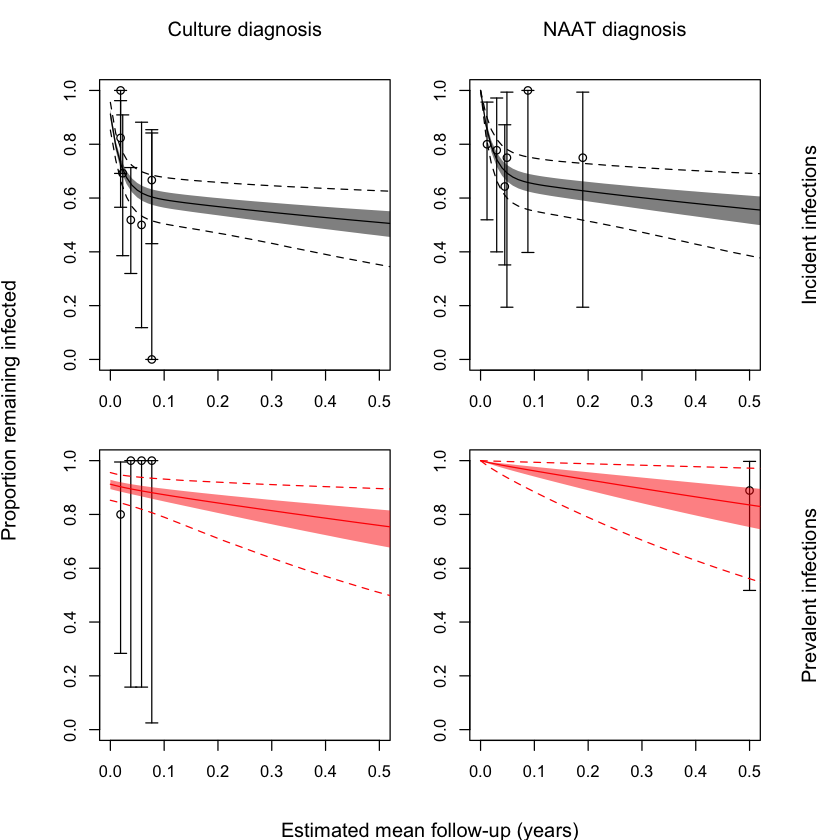

In [15]:
# observed mean duration of infection
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(2,2), mar=c(2,2,2,2), oma=c(3,3,2,2))

# incident infections; culture diagnosis
plot(0.1,0.1, pch='', xlim=c(0,0.5), ylim=c(0,1), xlab = "", ylab = "")
for(i in 1:sum(chlamydia_dat_m$studobs[1:chlamydia_dat_m$studnum_bytype[1]])){
    if(chlamydia_dat_m$seind[i] == 1){
        points(chlamydia_dat_m$t[i], (chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i])/chlamydia_dat_m$n[i])
        arrows(x0=chlamydia_dat_m$t[i], 
               y0=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[1], 
               y1=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[2],
               angle=90, code=3, length=0.05
              )
    }
}
polygon(
    c(sim_times, rev(sim_times)), c(apply(sims_all_culture, 2, quantile, p=0.25), rev(apply(sims_all_culture, 2, quantile, p=0.75))), border=NA,
    col=rgb(0,0,0,0.5) # colour
    # density = 20, col = gray(0.8) # black and white
    )
lines(sim_times, apply(sims_all_culture, 2, quantile, p=0.5))
lines(sim_times, apply(sims_all_culture, 2, quantile, p=0.025), lty=2)
lines(sim_times, apply(sims_all_culture, 2, quantile, p=0.975), lty=2)
mtext('Culture diagnosis', 3, line=2)
    
# incident infections; NAAT diagnosis
plot(0.1,0.1, pch='', xlim=c(0,0.5), ylim=c(0,1), xlab = "", ylab = "")
for(i in 1:sum(chlamydia_dat_m$studobs[1:chlamydia_dat_m$studnum_bytype[1]])){
    if(chlamydia_dat_m$seind[i] == 0){
        points(chlamydia_dat_m$t[i], (chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i])/chlamydia_dat_m$n[i])
        arrows(x0=chlamydia_dat_m$t[i], 
               y0=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[1], 
               y1=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[2],
               angle=90, code=3, length=0.05
              )
    }
}
polygon(
    c(sim_times, rev(sim_times)), c(apply(sims_all, 2, quantile, p=0.25), rev(apply(sims_all, 2, quantile, p=0.75))), border=NA,
    col=rgb(0,0,0,0.5) # colour
    # density = 20, col = gray(0.8) # black and white
    )
lines(sim_times, apply(sims_all, 2, quantile, p=0.5))
lines(sim_times, apply(sims_all, 2, quantile, p=0.025), lty=2)
lines(sim_times, apply(sims_all, 2, quantile, p=0.975), lty=2)
mtext('NAAT diagnosis', 3, line=2)
mtext('Incident infections', 4, line=2)

    
# prevalent infections; culture diagnosis
plot(0.1,0.1, pch='', xlim=c(0,0.5), ylim=c(0,1), xlab = "", ylab = "")
for(i in (1+sum(chlamydia_dat_m$studobs[1:chlamydia_dat_m$studnum_bytype[1]])):chlamydia_dat_m$Nobs){
    if(chlamydia_dat_m$seind[i] == 1){
        points(chlamydia_dat_m$t[i], (chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i])/chlamydia_dat_m$n[i])
        arrows(x0=chlamydia_dat_m$t[i], 
               y0=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[1], 
               y1=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[2],
               angle=90, code=3, length=0.05
              )
    }
}
polygon(c(sim_times, rev(sim_times)), c(apply(sims_prev_culture, 2, quantile, p=0.25), rev(apply(sims_prev_culture, 2, quantile, p=0.75))), border=NA,
        col=rgb(1,0,0,0.5))
lines(sim_times, apply(sims_prev_culture, 2, quantile, p=0.5), col=2)
lines(sim_times, apply(sims_prev_culture, 2, quantile, p=0.025), lty=2, col=2)
lines(sim_times, apply(sims_prev_culture, 2, quantile, p=0.975), lty=2, col=2)
    
# incident infections; NAAT diagnosis
plot(0.1,0.1, pch='', xlim=c(0,0.5), ylim=c(0,1), xlab = "", ylab = "")
for(i in (1+sum(chlamydia_dat_m$studobs[1:chlamydia_dat_m$studnum_bytype[1]])):chlamydia_dat_m$Nobs){
    if(chlamydia_dat_m$seind[i] == 0){
        points(chlamydia_dat_m$t[i], (chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i])/chlamydia_dat_m$n[i])
        arrows(x0=chlamydia_dat_m$t[i], 
               y0=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[1], 
               y1=(binom.test(chlamydia_dat_m$n[i] - chlamydia_dat_m$r[i], chlamydia_dat_m$n[i]))$conf.int[2],
               angle=90, code=3, length=0.05
              )
    }
}
polygon(c(sim_times, rev(sim_times)), c(apply(sims_prev, 2, quantile, p=0.25), rev(apply(sims_prev, 2, quantile, p=0.75))), border=NA,
        col=rgb(1,0,0,0.5))
lines(sim_times, apply(sims_prev, 2, quantile, p=0.5), col=2)
lines(sim_times, apply(sims_prev, 2, quantile, p=0.025), lty=2, col=2)
lines(sim_times, apply(sims_prev, 2, quantile, p=0.975), lty=2, col=2)
mtext('Prevalent infections', 4, line=2)

mtext('Estimated mean follow-up (years)', 1, outer=TRUE, line=2)
mtext('Proportion remaining infected', 2, outer=TRUE, line=2)

In these plots, the points and error bars show the proportion of infections which were observed to persist and the 95% confidence interval.

## Differences between men and women

Finally, we subtract samples from the posterior distributions in women from those in men to provide posterior distributions for the female-male difference. These samples are plotted in two dimensions.

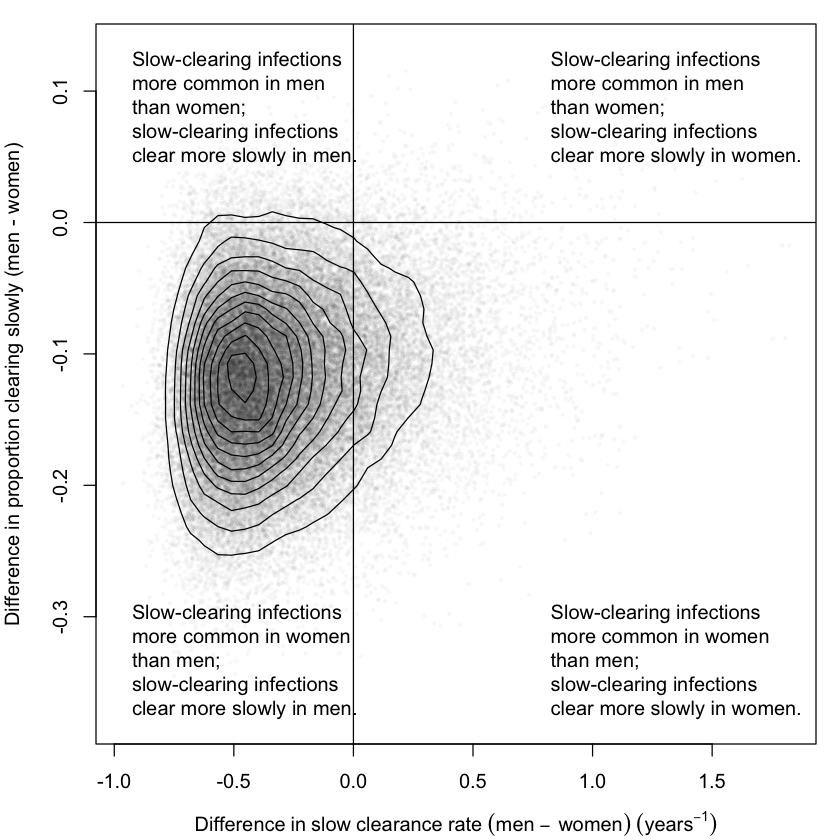

In [16]:
##################################
# differences between men and women
##################################
options(repr.plot.width=7, repr.plot.height=7)
par(mar = c(4,4,1,1))

plot(op_m$lambda_slow - op_f$lambda_slow,
     op_f$p1 - op_m$p1,
     pch=16, cex=0.5, col=rgb(0,0,0,0.03),
     xlab = expression(Difference ~ "in" ~ slow ~ clearance ~ rate ~ (men ~ - ~ women) ~ (years^{-1})),
     ylab = "Difference in proportion clearing slowly (men - women)",
    )
abline(h=0)
abline(v=0)

## some pretty colors
library(MASS)
k <- 11
z <- kde2d(op_m$lambda_slow - op_f$lambda_slow, op_f$p1 - op_m$p1, n=50)
contour(z, drawlabels=FALSE, nlevels=k, col='black', add=TRUE)

legend('topleft', 
       legend = "Slow-clearing infections \nmore common in men \nthan women; \nslow-clearing infections \nclear more slowly in men. ",
       bty='n', adj=c(0,0.25))
legend('bottomleft', 
       legend = "Slow-clearing infections \nmore common in women \nthan men; \nslow-clearing infections \nclear more slowly in men. ",
       bty='n', adj=c(0,-0.05))
legend('topright', 
       legend = "Slow-clearing infections \nmore common in men \nthan women; \nslow-clearing infections \nclear more slowly in women. ",
       bty='n', adj=c(0,0.25))
legend('bottomright', 
       legend = "Slow-clearing infections \nmore common in women \nthan men; \nslow-clearing infections \nclear more slowly in women. ",
       bty='n', adj=c(0,-0.05))


In this plot the x-axis represents differences in clearance rate and the y-axis differences in the proportion of infections which are slow-clearing. Solid lines at x = 0 and y = 0 divide samples in which parameters are higher/lower in men vs. women.

We can calculate the proportion of samples corresponding to each of these hypotheses:

In [17]:
# proportion of samples in halves/quadrants of the plot

paste('Slow-clearing infections clear faster in women: ',
    100*round(
    sum(op_m$lambda_slow < op_f$lambda_slow)/
    length(op_m$lambda_slow),
    2), '%')

paste('Slow-clearing infections more common in women: ',
    100*round(
    sum(op_f$p1 < op_m$p1)/
    length(op_m$lambda_slow),
    2), '%')


paste('Slow-clearing infections more common in women; slow-clearing infections clear more slowly in men: ',
    100*round(
    sum((op_m$lambda_slow < op_f$lambda_slow) & (op_f$p1 < op_m$p1))/
    length(op_m$lambda_slow),
    2), '%')

[1] "Slow-clearing infections clear faster in women:  87 %"

[1] "Slow-clearing infections more common in women:  97 %"

[1] "Slow-clearing infections more common in women; slow-clearing infections clear more slowly in men:  85 %"

The most likely scenario is that slow-clearing infections are more common in women but clear more slowly in men.